# Import libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# Import Dataset

In [4]:
listings=pd.read_csv('/content/ListingsSmall.csv')


## Find the data types for each column for listing dataset

In [8]:
listings.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count        int64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

## Find the descriptive statistics for listings dataset

In [9]:
listings.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1000.00000,1.000000e+03,567.000000,675.000000,1000.000000,1000.000000,1000.000000,1000.000000,945.000000,1000.000000,1000.000000,1000.000000,899.000000,895.000000,895.000000,894.000000,894.000000,894.000000,894.000000
mean,79276.19700,1.020376e+06,0.918501,0.785467,3.681000,29.850047,-14.683304,3.321000,1.420106,389.113000,14.211000,376.792000,93.374861,9.560894,9.330726,9.771812,9.753915,9.572707,9.306488
std,49553.09741,1.229703e+07,0.211818,0.302841,8.042756,27.082053,55.193889,2.123315,0.828657,1138.120515,33.974826,378.754672,6.564963,0.764444,0.865770,0.612898,0.631269,0.689689,0.745289
min,2577.00000,2.330000e+03,0.000000,0.000000,0.000000,-34.135720,-99.273350,1.000000,1.000000,14.000000,1.000000,1.000000,33.000000,2.000000,2.000000,4.000000,2.000000,4.000000,4.000000
25%,36476.75000,1.342885e+05,1.000000,0.670000,1.000000,40.675380,-73.948725,2.000000,1.000000,70.750000,2.000000,45.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,68937.00000,3.010580e+05,1.000000,0.950000,2.000000,40.800800,2.349205,3.000000,1.000000,110.000000,3.000000,302.500000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
75%,118177.25000,5.518368e+05,1.000000,1.000000,3.000000,41.904008,12.496903,4.000000,2.000000,245.000000,30.000000,730.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,177495.00000,2.910074e+08,1.000000,1.000000,77.000000,48.897130,151.316920,16.000000,7.000000,17900.000000,365.000000,1125.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


##  Find how many null values per column

> Indented block



In [10]:
#There are two methods. The first one is a command, the 2nd one is something that you have already did on previous question ;)
listings.isna().sum().sum()

2655

Find how many listings per property type

In [11]:
#There are 2 methods. Choose whatever suits you best
listings['property_type'].unique()

array(['Entire apartment', 'Private room in apartment', 'Entire loft',
       'Entire guesthouse', 'Private room in bed and breakfast',
       'Private room in condominium', 'Entire condominium',
       'Private room in loft', 'Private room in house', 'Entire house',
       'Entire townhouse', 'Room in serviced apartment', 'Entire villa',
       'Room in hostel', 'Entire guest suite',
       'Private room in townhouse', 'Private room',
       'Private room in guesthouse', 'Private room in guest suite',
       'Room in bed and breakfast', 'Shared room in apartment',
       'Room in boutique hotel', 'Shared room in hostel',
       'Private room in serviced apartment', 'Private room in villa',
       'Entire bungalow', 'Earth house'], dtype=object)

## Replace f/t values of instant bookable column to No/Yes respectively (hint: inplace = True)

In [47]:
#inplace=True
listings['instant_bookable'].replace({'f':'No','t':'Yes'})

0       No
1       No
2       No
3       No
4       No
      ... 
995    Yes
996     No
997     No
998     No
999     No
Name: instant_bookable, Length: 1000, dtype: object

In [48]:
listings['instant_bookable'].replace({'f':'No','t':'Yes'}, inplace=True)



```
# This is formatted as code
```

## Sort dataset by price in descending order

In [50]:
#inplace=True
listings.sort_values('price', ascending=False, inplace=True)


## Fill empty (nan) values of host_response_time to N/A

In [70]:
#inplace=True
listings['host_response_time'].isnull().sum()

433

In [83]:
listings[' host_response_time'] = listings['host_response_time'].fillna('N/A').inplace=True 


## Find how many listings per host_response_time in a pie chart

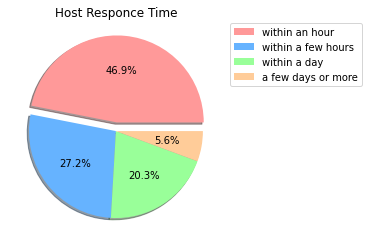

In [15]:
df = pd.DataFrame(listings)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice (The biggest)
data = listings['host_response_time'].value_counts().plot(kind="pie", autopct='%1.1f%%', radius=1, shadow=True, explode=explode, colors=colors, legend=False, title='Host Responce Time',ylabel='', labeldistance=None)
data.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


## Find the average price per city and visualize it in a sorted, bar chart

*   List item
*   List item



In [16]:
listings.groupby('city').mean()['price']


city
Bangkok           1673.823529
Cape Town         2101.611111
Hong Kong          979.000000
Istanbul           557.061224
Mexico City       2392.818182
New York           151.346626
Paris              107.658768
Rio de Janeiro     431.373494
Rome                87.558974
Sydney            1110.433333
Name: price, dtype: float64

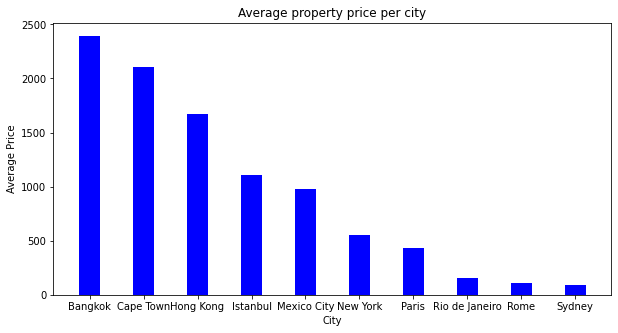

In [18]:
city = listings.groupby('city').mean()['price'].index
price = listings.groupby('city').mean()['price'].sort_values(ascending=False)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot

plt.bar(city, price, color ='blue', width = 0.4)

plt.xlabel("City")  #Add label to x axis 
plt.ylabel("Average Price")  #Add label to y axis
plt.title("Average property price per city")  #Add title to plot


plt.show()